# LCPB 23-24 Exercise 2, data visualization and clustering
### Group Members:
* HOOMAN SABZI 2119061
* FRANCO AQUISTAPACE TAGUA 2106651
* MARGARITA SHNAIDER 2107523
* DAIZE LI 2106187

In [ ]:
# import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import NullFormatter
import seaborn as sns
from time import time
from collections import OrderedDict
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn import manifold #TSNE
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

#plt.rcParams['font.size'] = 15
%matplotlib inline

## Data and labels
In this example we know the labels, hence we can test the performances of t-SNE and DBSCAN

In [ ]:
file_link = 'https://docs.google.com/uc?export=download&id=' + '1xANAUF90n7j7Ihu_xf2RlS1Fi7wdV3nR'
!wget "$file_link" -O x_12d.dat

--2024-03-15 10:10:48--  https://docs.google.com/uc?export=download&id=1xANAUF90n7j7Ihu_xf2RlS1Fi7wdV3nR
Resolving docs.google.com (docs.google.com)... 172.217.164.14, 2607:f8b0:4025:803::200e
Connecting to docs.google.com (docs.google.com)|172.217.164.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1xANAUF90n7j7Ihu_xf2RlS1Fi7wdV3nR&export=download [following]
--2024-03-15 10:10:49--  https://drive.usercontent.google.com/download?id=1xANAUF90n7j7Ihu_xf2RlS1Fi7wdV3nR&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.65.97, 2607:f8b0:4025:815::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.65.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 183543 (179K) [application/octet-stream]
Saving to: ‘x_12d.dat’

x_12d.dat           100%[===================>] 179.24K  --.-KB/s    in 0.06s   

2024-

In [ ]:
file_link = 'https://docs.google.com/uc?export=download&id=' + '1n94fIKkE4TDxZhx6pCovbaY0LyUdufJ1'
!wget "$file_link" -O y_12d.dat

--2024-03-15 10:10:50--  https://docs.google.com/uc?export=download&id=1n94fIKkE4TDxZhx6pCovbaY0LyUdufJ1
Resolving docs.google.com (docs.google.com)... 172.217.164.14, 2607:f8b0:4025:803::200e
Connecting to docs.google.com (docs.google.com)|172.217.164.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1n94fIKkE4TDxZhx6pCovbaY0LyUdufJ1&export=download [following]
--2024-03-15 10:10:50--  https://drive.usercontent.google.com/download?id=1n94fIKkE4TDxZhx6pCovbaY0LyUdufJ1&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.65.97, 2607:f8b0:4025:815::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.65.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1200 (1.2K) [application/octet-stream]
Saving to: ‘y_12d.dat’

y_12d.dat           100%[===================>]   1.17K  --.-KB/s    in 0s      

2024-03

In [ ]:
fname, fnamey = "x_12d.dat", "y_12d.dat"

data = np.loadtxt(fname, delimiter = '\t')
y = np.loadtxt(fnamey, dtype = int)

N = len(data)
D = len(data[0])

print("N =", N, "  L = D = ", D)
X = data

N = 600   L = D =  12


## Find the typical minimum distance between points
This yields a typical scale, to be used as a reference for "eps"

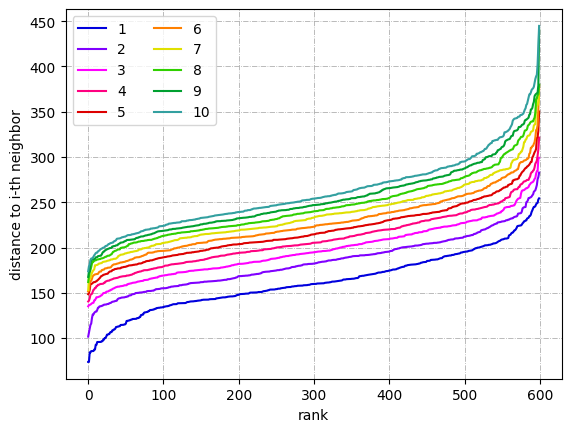

mean minimum distance between points:  162.34622464324366


In [ ]:
nn = 10
nbrs = NearestNeighbors(n_neighbors=nn+1).fit(X) #, algorithm='ball_tree'
d, ind = nbrs.kneighbors(X)
dd=d.T

# note: dd[0] has a trivial set of zeros
listc= ["#0000DD", "#8000FF", "#FF00FF", "#FF0080", "#DD0000",
        "#FF8000", "#E0E000", "#30D000", "#00A030", "#33A0A0"]

for i in range(1, nn+1):
    plt.plot(np.sort(dd[i]), c=listc[i-1], label=str(i))
    plt.xlabel("rank")
    plt.ylabel("distance to i-th neighbor")
plt.legend(ncol=2)
plt.grid(linestyle='-.', linewidth=0.6)
plt.show()

mean_min_dist = np.mean(dd[1])
print("mean minimum distance between points: ", mean_min_dist)

## t-SNE visualization, for true labels

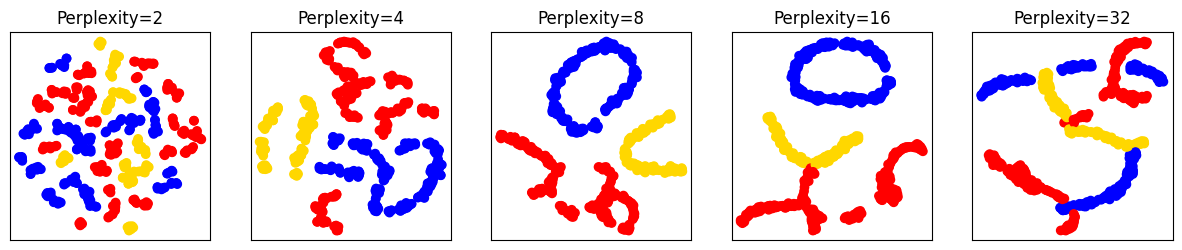

In [ ]:
np.random.seed(0)
n_samples = N
n_components = 2
perplexities = [2, 4, 8, 16, 32]
Np = len(perplexities)
mycmap = ListedColormap(["blue","red","gold" ])

(fig, subplots) = plt.subplots(1,Np , figsize=(3*Np, 2.7))

X_all = []

for i, perplexity in enumerate(perplexities):
    ax = subplots[i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity, learning_rate=200)
    Y = tsne.fit_transform(data)
    t1 = time()
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=y,cmap=mycmap)
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    X_all.append(Y)

plt.show()

## Different random initial states (random_state=i)

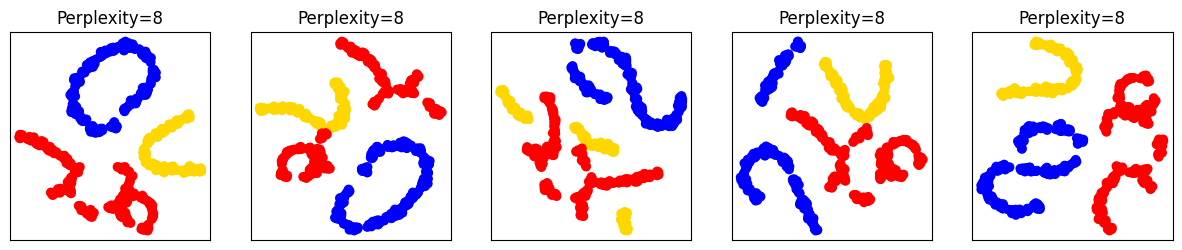

In [ ]:
n_samples = N
n_components = 2
mycmap = ListedColormap(["blue", "red", "gold" ])

(fig, subplots) = plt.subplots(1, Np, figsize=(3*Np, 2.7))

X_all = []

perplexity = 8

for i in range(5):
    np.random.seed(i)
    ax = subplots[i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=i, perplexity=perplexity,  learning_rate=200)
    Y = tsne.fit_transform(data)
    t1 = time()
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=y, cmap=mycmap)
    ax.tick_params(left=False, bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    X_all.append(Y)

plt.show()

## DBSCAN: find labels by applying clustering

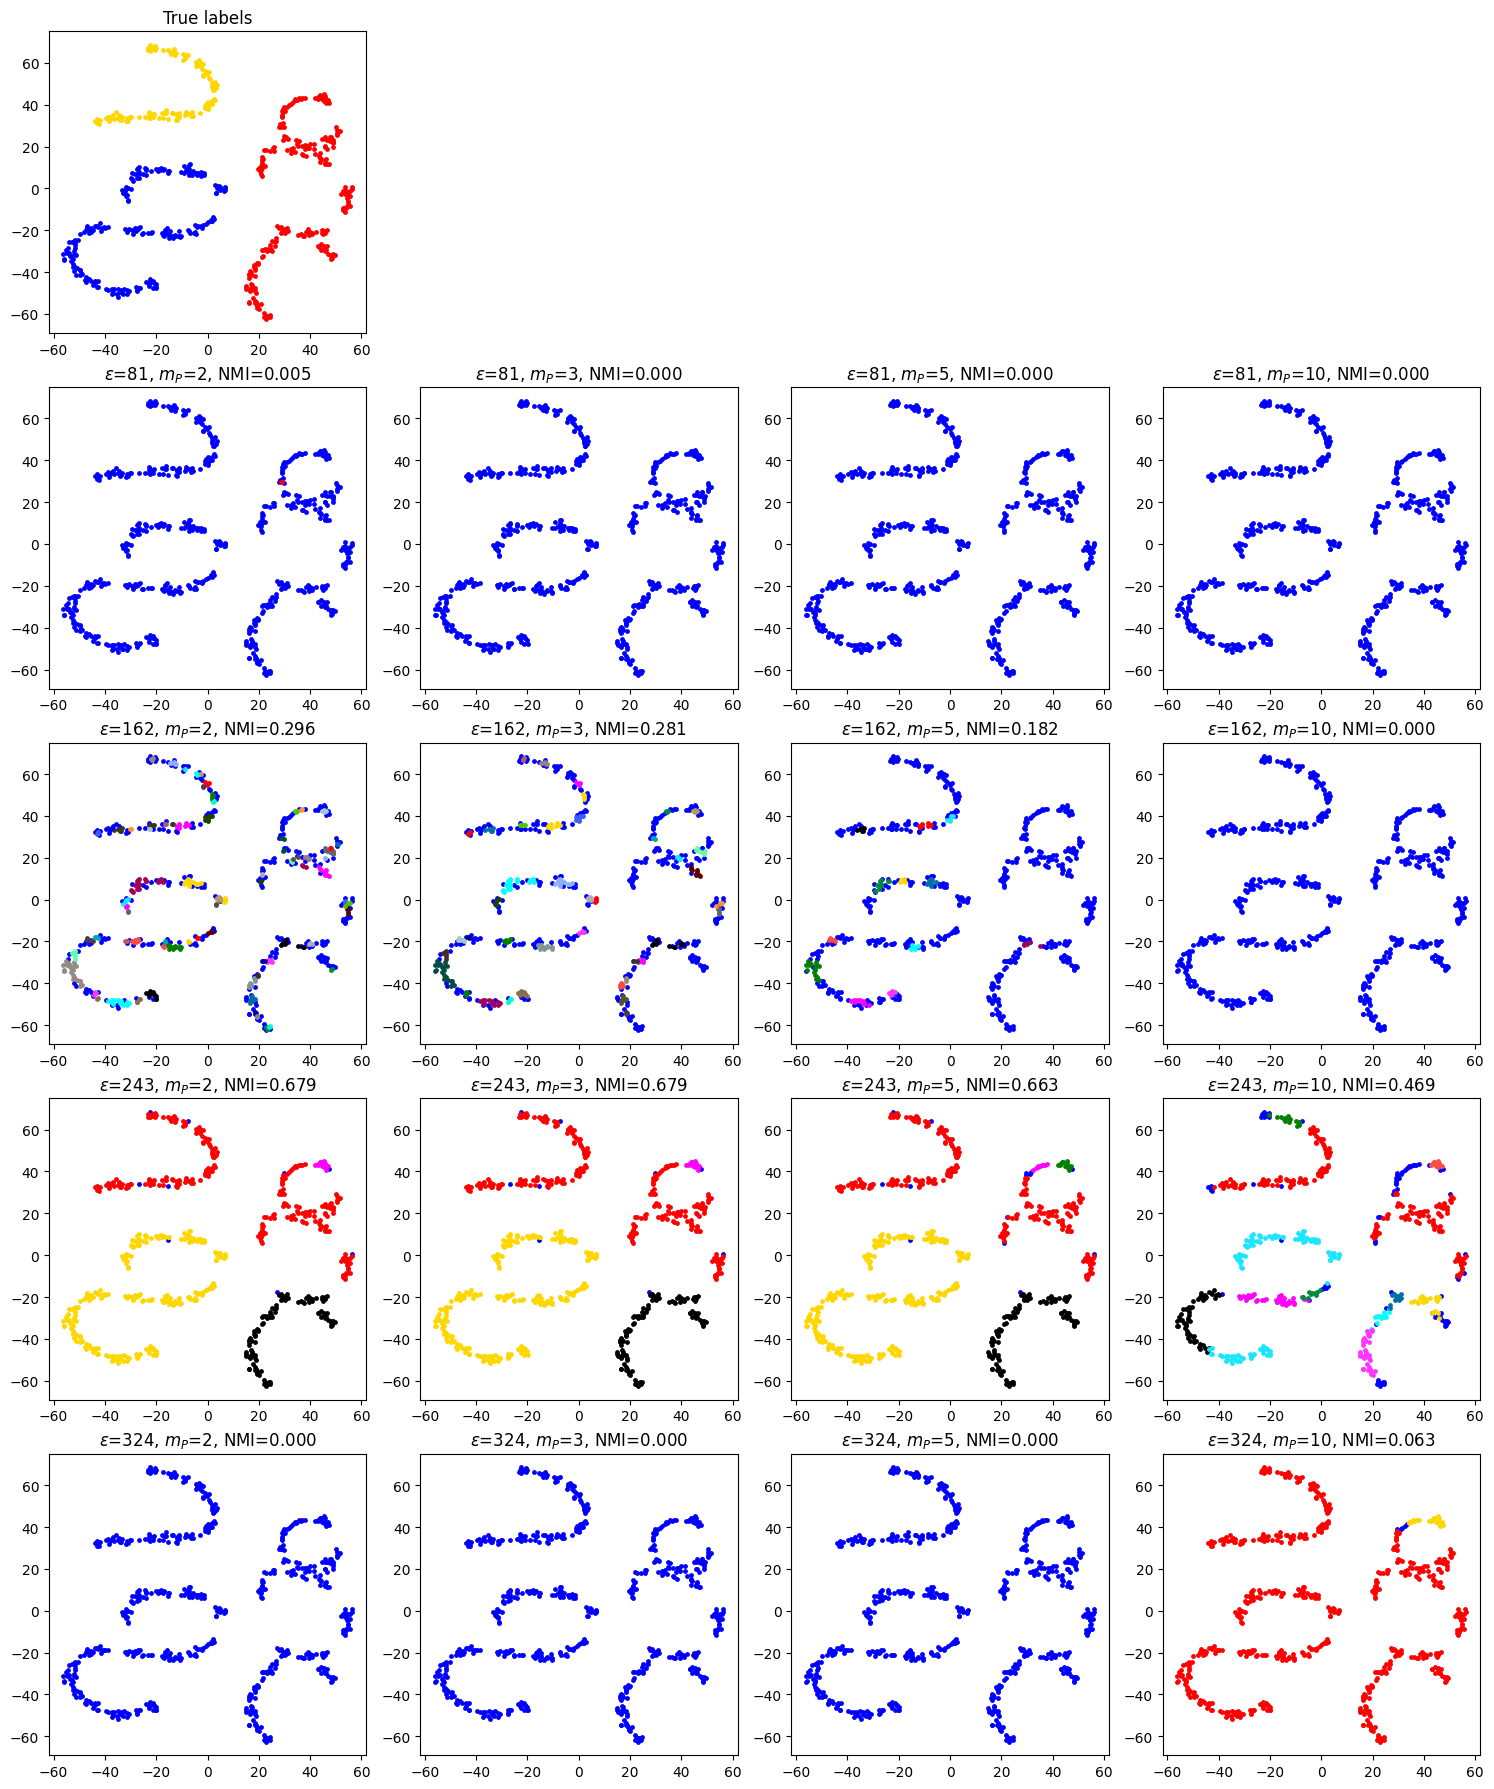

In [ ]:
cpalette = ["blue", "red", "gold", "black", "magenta", "green", "cyan",
            "#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059",
            "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
            "#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53",
            "#886F4C", "#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375",
            "#A3C8C9", "#FF913F", "#938A81", "#575329", "#00FECF", "#B05B6F"]

ms = 6

def clustering(y):
    # Finds position of labels and returns a dictionary of cluster labels to data indices.
    yu = np.sort(np.unique(y))
    clustering = OrderedDict()
    for ye in yu:
        clustering[ye] = np.where(y == ye)[0]
    return clustering

def entropy(c, n_sample):
    # Measures the entropy of a cluster
    h = 0.
    for kc in c.keys():
        p=len(c[kc])/n_sample
        h+=p*np.log(p)
    h*=-1.
    return h

# Normalized mutual information function
# Note that this deals with the label permutation problem
def NMI(y_true, y_pred):
    """ Computes normalized mutual information: where y_true and y_pred are both clustering assignments
    """
    w = clustering(y_true)
    c = clustering(y_pred)
    n_sample = len(y_true)

    Iwc = 0.
    for kw in w.keys():
        for kc in c.keys():
            w_intersect_c=len(set(w[kw]).intersection(set(c[kc])))
            if w_intersect_c > 0:
                Iwc += w_intersect_c*np.log(n_sample*w_intersect_c/(len(w[kw])*len(c[kc])))
    Iwc/=n_sample
    Hc = entropy(c,n_sample)
    Hw = entropy(w,n_sample)

    return 2*Iwc/(Hc+Hw)

def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        ax.scatter(X[pos,0], X[pos,1],c=cpalette[i%len(cpalette)],s=ms)

# DBSCAN has a few parameters, let's sweep over a few parameters and see what happens
np.random.seed(12345)
n_true_center=3
#X, ytrue = make_blobs(10000, 2, n_true_center) # Generating random gaussian mixture
X2D = X_all[-1] # best(?) visualization above, in my opinion the second and the last are good
X = data
y_true = y

#eps_range = [0.01,0.1,0.5,1.0,10.]
if mean_min_dist<10:
    r=mean_min_dist
else:
    r = int(mean_min_dist)
eps_range = [r/2,r,1.5*r,2*r]

min_sample_range = [2,3,5,10]
DIMY=len(eps_range)
DIMX=len(min_sample_range)
fig, ax = plt.subplots(DIMY+1,DIMX,figsize=(15,18))

i,j=0,0
nmi=1
plotting_ax(X2D,y,ax[i,j])
ax[i,j].set_title('True labels')
for j in range(1,DIMX): fig.delaxes(ax[i,j])

for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X)
        y_hat = model.labels_
        plotting_ax(X2D,y_hat,ax[i+1,j])
        nmi=NMI(y_hat, y_true)
        ax[i+1,j].set_title(r'$\epsilon$=%.0f, $m_P$=%i, NMI=%.3f'%(eps,min_samples,nmi))

plt.tight_layout(h_pad=0.5)
plt.show()

### 1. `“eps” (ε) and “minPts” (mP) in DBSCAN algorithm for clustering`
Refine the grid with more values of “eps” and “minPts” and show a heat-map of the normalized mutual information (NMI) between true and predicted clusters.

**Is there a correlation between these two parameters in providing a high NMI?**

Note: in the lesson we have looked at the typical distance between a point and its closest neighbor, but this does not say what is the typical distance from the 2nd, 3rd , …, mP-neighbor.
The plots of ranked distances to the i-th neighbor might also help choose the ε for a given i=mP .

In [ ]:
#X, ytrue = make_blobs(10000, 2, n_true_center) # Generating random gaussian mixture
X2D = X_all[0] # best visualization above
X = data
y_true = y

#eps_range = np.linspace(50, 400, 100)
def clustering(y):
    # Finds position of labels and returns a dictionary of cluster labels to data indices.
    yu = np.sort(np.unique(y))
    clustering = OrderedDict()
    for ye in yu:
        clustering[ye] = np.where(y == ye)[0]
    return clustering

def entropy(c, n_sample):
    # Measures the entropy of a cluster
    h = 0.
    for kc in c.keys():
        p=len(c[kc])/n_sample
        h+=p*np.log(p)
    h*=-1.
    return h

# Normalized mutual information function
# Note that this deals with the label permutation problem
def NMI(y_true, y_pred):
    """ Computes normalized mutual information: where y_true and y_pred are both clustering assignments
    """
    w = clustering(y_true)
    c = clustering(y_pred)
    n_sample = len(y_true)

    Iwc = 0.
    for kw in w.keys():
        for kc in c.keys():
            w_intersect_c=len(set(w[kw]).intersection(set(c[kc])))
            if w_intersect_c > 0:
                Iwc += w_intersect_c*np.log(n_sample*w_intersect_c/(len(w[kw])*len(c[kc])))
    Iwc/=n_sample
    Hc = entropy(c,n_sample)
    Hw = entropy(w,n_sample)

    return 2*Iwc/(Hc+Hw)


if mean_min_dist<10:
    r=mean_min_dist
else:
    r = int(mean_min_dist)

eps_range = np.linspace(1, 20, 100)*r
minPts=np.arange(60)+1

heat = np.zeros((len(minPts) ,len(eps_range)))

#eps_range = [r,3*r,6*r,9*r,12*r]
#min_sample_range = [3,5,10,20]
#fig, ax = plt.subplots(len(eps_range),len(min_sample_range),figsize=(15,18))
for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(minPts):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X)
        y_hat = model.labels_
        #plotting_ax(X2D,y_hat,ax[i,j])
        heat[j, i]=NMI(y_hat, y_true)
        #ax[i,j].set_title('eps=%.2f, minPts=%i\nnmi=%.2f'%(eps,min_samples,nmi))


In [ ]:
EPS_MIN, EPS_MAX, EPS_STEP = 80, 380, 10
MS_MIN, MS_MAX, MS_STEP = 1, 50, 1
eps_range = np.arange(EPS_MIN, EPS_MAX,step=EPS_STEP)
min_sample_range = np.arange(MS_MIN, MS_MAX, step=MS_STEP)
nmi_arr = []
for i, eps in enumerate(eps_range):
    new_row = []
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X)
        y_hat = model.labels_
        nmi=NMI(y_hat, y_true)
        new_row.append(nmi)
    nmi_arr.append(new_row)

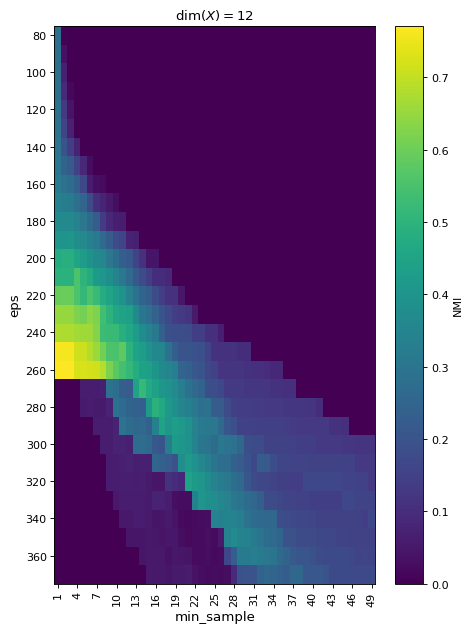

In [ ]:
FONTSIZE = 12
fig, ax = plt.subplots(figsize=(6, 8), nrows=1, ncols=1, dpi=80)
img = ax.imshow(nmi_arr, aspect='auto')
cbar = plt.colorbar(img,label='NMI')
cbar.ax.tick_params(labelsize=FONTSIZE-2)
# Set ticks and labels
plt.xticks(np.arange((MS_MAX-MS_MIN)/MS_STEP, step=3),
           labels=np.arange(MS_MIN, MS_MAX, step=3))
plt.yticks(np.arange((EPS_MAX-EPS_MIN)/EPS_STEP, step=2),
           labels=np.arange(EPS_MIN, EPS_MAX, step=20))
# Set tick params
plt.tick_params(axis='x', labelrotation=90)
plt.tick_params(labelsize=FONTSIZE-2)
# Set axes labels
plt.xlabel('min_sample', fontsize=FONTSIZE)
plt.ylabel('eps', fontsize=FONTSIZE)
# Set limits
plt.title(r'$\dim(X) = 12$')
plt.tight_layout()

The value of eps on the plot of ranked distances to the i-th neighbor can be found by looking at the area where the change of curve is most pronounced. NMI shows an agreement between the truth class and a clustering algorithm (the bigger agreement the better performance of the model).


The eps and min_sample do affect the performance of the model, as it can be seen in the non-random nature of our graph. Also there is a visible correlation between two parameters. Nevertheless we might add that it is not trivial to make general statements about the optimal values for the parameters, as it highly depends on the underlying data.

### 2. `Understanding the 12-dimensional data`
Use the PCA to visualize the first components of the data. Does it help to understand its structure?

In [ ]:
# Initialize PCA with the desired number of components
n_components = 2
pca = PCA(n_components=n_components)

# Fit and transform your data
X_pca = pca.fit_transform(X)

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio}')

Explained Variance Ratio: [0.5608603 0.309137 ]


* 2-D graph using PC1 and PC2 would be a good approximation of data since it would account for ≈ 86% of the variation in the data.

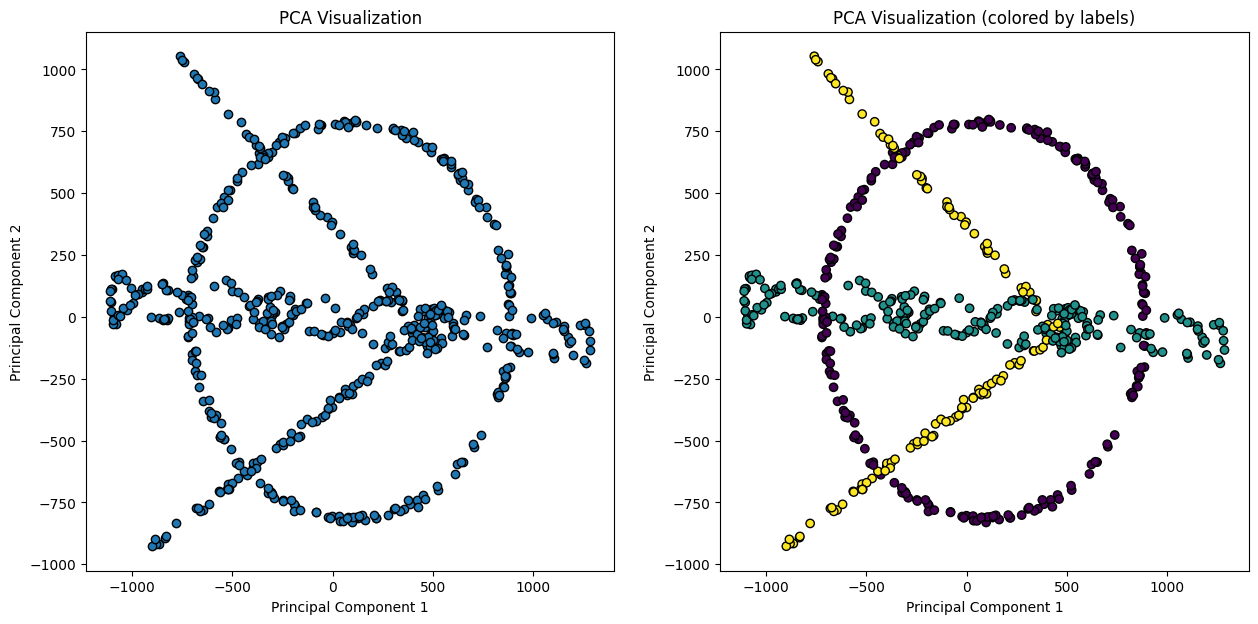

In [ ]:
# Scatter plot of the PCA-transformed data
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolors='k')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k')
plt.title('PCA Visualization (colored by labels)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

### 3. Compare different clustering methods
* a) Perform a k-means clustering of the data, with k=3. Does it work better than DBSCAN? Why?
* b) Perform a hierarchical clustering of the data and plot the dendrogram. Does it work better than DBSCAN?

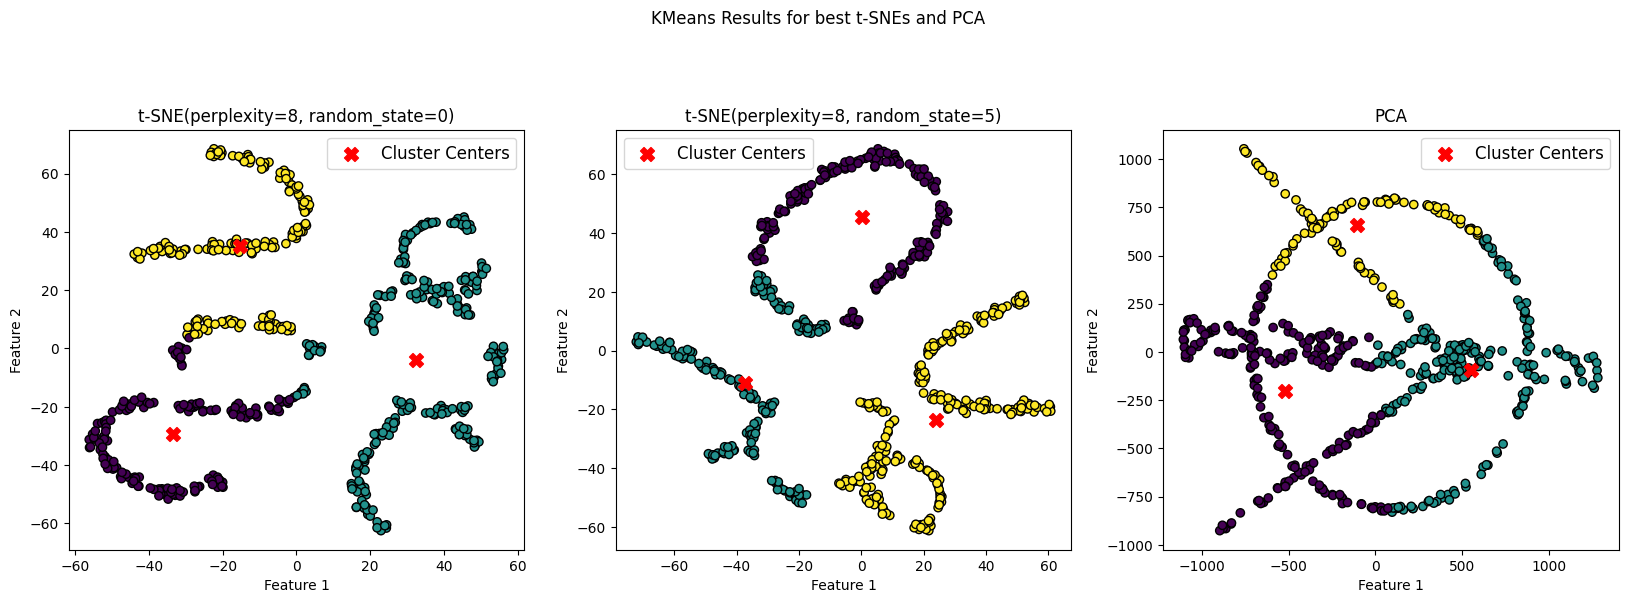

In [ ]:
# a:
# I want to implement k-means on best t-SNE results and PCA result
x_data = []
# best t-SNE results
x_data.append(X_all[-1])
x_data.append(X_all[0])
# PCA result
x_data.append(X_pca)

# Create a KMeans instance with the desired number of clusters (k)
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')

#plot the results
plt.figure(figsize=(20, 12))
titles = ['t-SNE(perplexity=8, random_state=0)',
          't-SNE(perplexity=8, random_state=5)', 'PCA']

for i in range(len(x_data)):
  # extract the data
  x = x_data[i]
  # Fit model to data
  kmeans.fit(x)

  # Get the cluster centers and labels
  cluster_centers = kmeans.cluster_centers_
  labels = kmeans.labels_

  # Visualize the clustering results
  plt.subplot(2, 3, i+1)
  plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', edgecolors='k')
  plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X',
              s=100, label='Cluster Centers')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title(titles[i])
  plt.legend(fontsize='12')

plt.suptitle('KMeans Results for best t-SNEs and PCA')
plt.show()

* Centroid based algorithms (k-means) can make explicit assumptions about the shape of the clusters which allows them to work on **a small amount of data**. Whereas DBSCAN (density based algorithm) is an algorithm where the shape of clusters is defined by data, so it is required to have **a lot more data** for the algorithm to be effective.

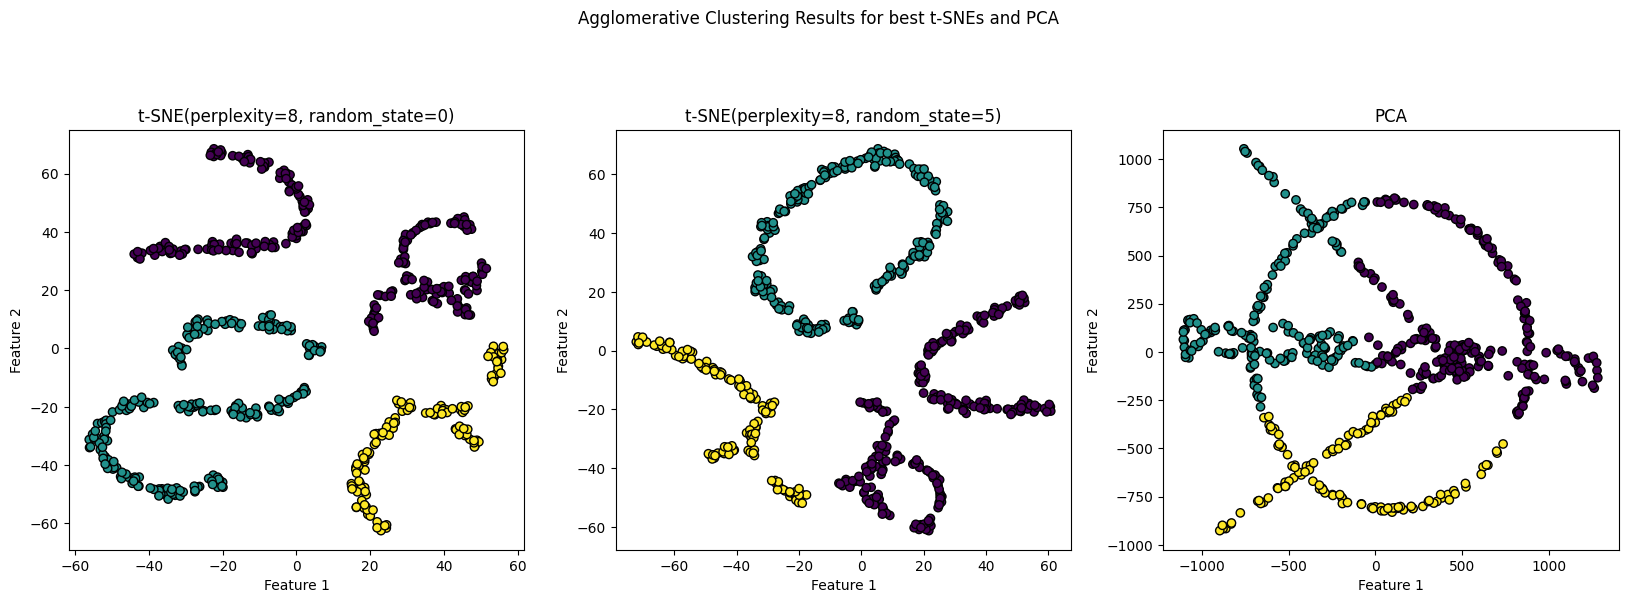

In [ ]:
# b
# Create a AgglomerativeClustering instance with the desired number of clusters (k)
agg_clustering = AgglomerativeClustering(n_clusters=3)

# plot the results
plt.figure(figsize=(20, 12))

for i in range(len(x_data)):
  # extract the data
  x = x_data[i]

  # fit and predict
  agg_labels = agg_clustering.fit_predict(x)

  # Visualize the clustering results
  plt.subplot(2, 3, i+1)
  plt.scatter(x[:, 0], x[:, 1], c=agg_labels, cmap='viridis', edgecolors='k')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title(titles[i])

plt.suptitle('Agglomerative Clustering Results for best t-SNEs and PCA')
plt.show()

* DBSCAN gives a single grouping of the data while hierarchical clustering returns sets of nested relations between the data. So hierarchical clustering works better (*but still not perfect, maybe HDBSCAN would be better...*)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

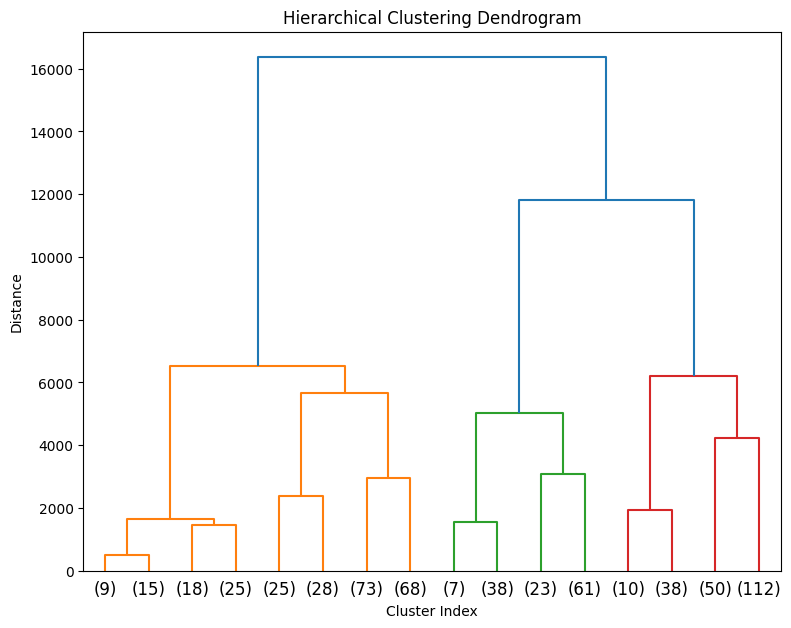

In [ ]:
link = linkage(x, 'ward', 'euclidean')

# Plot the corresponding dendrogram
fig = plt.figure(figsize=(9,7))
dn = dendrogram(link, p=3, truncate_mode='level')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Index')
plt.ylabel('Distance')
plt.show()

### 4. `OPTIONAL: Visualize the data` with other methods from the scikit package

standard: 0.19 sec
ltsa: 0.33 sec
hessian: 0.29 sec
modified: 0.24 sec
ISO: 0.37 sec
MDS: 0.71 sec
Spectral Embedding: 0.096 sec
t-SNE: 2.5 sec


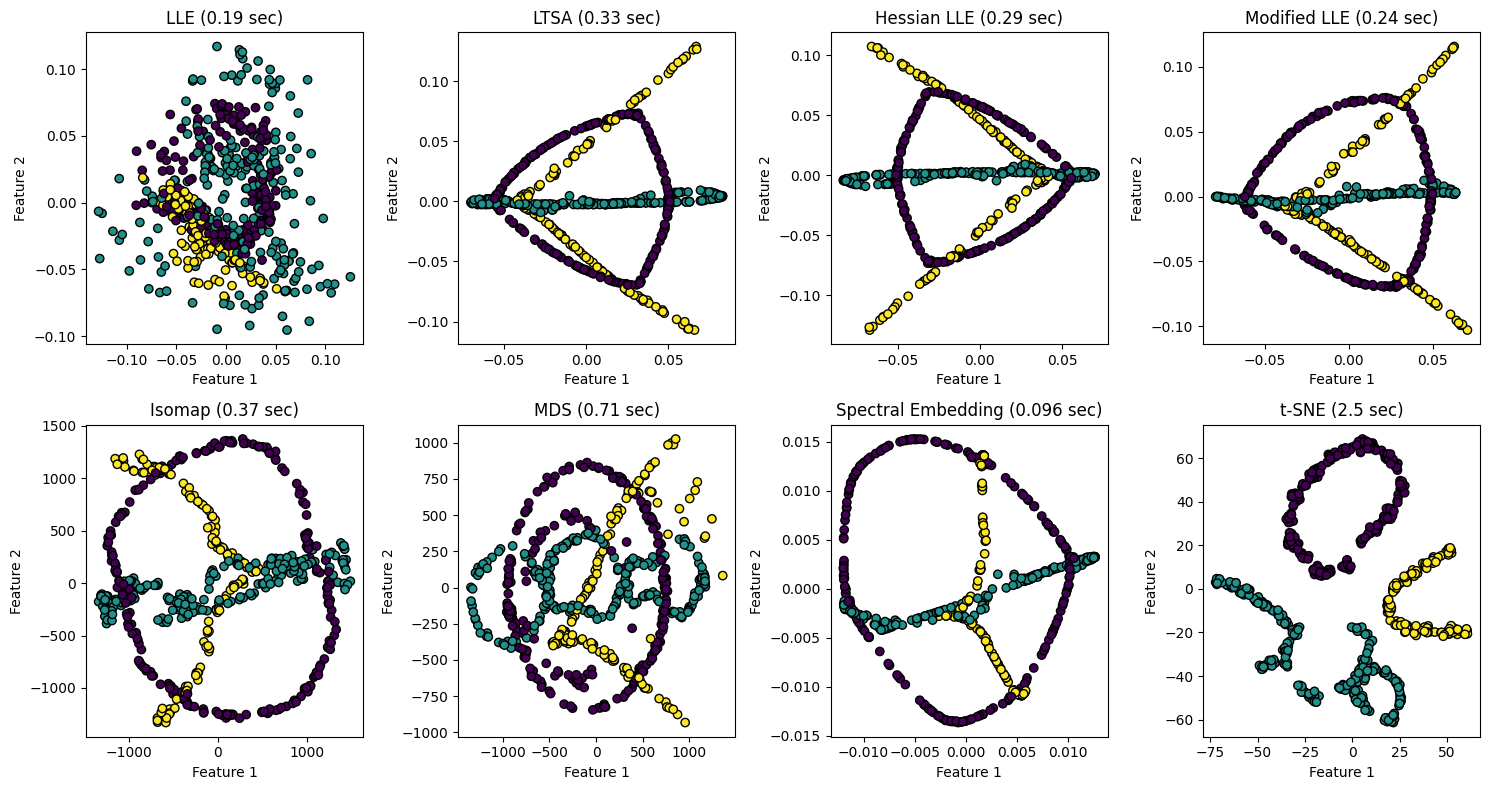

In [ ]:
n_neighbors = 30  # Increase number of neighbors

fig = plt.figure(figsize=(15, 8))

# Perform Locally Linear Embedding Manifold learning
methods = ["standard", "ltsa", "hessian", "modified"]
labels = ["LLE", "LTSA", "Hessian LLE", "Modified LLE"]

for i, method in enumerate(methods):
    t0 = time()
    trans_data = (
        manifold.LocallyLinearEmbedding(
            n_neighbors=n_neighbors, n_components=2, method=method, random_state=42
        )
        .fit_transform(data)
        .T
    )
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(2, 4, i+1)
    plt.scatter(trans_data[0], trans_data[1], c=y, edgecolors='k')
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Perform Isomap Manifold learning.
t0 = time()
trans_data = (
    manifold.Isomap(n_neighbors=n_neighbors, n_components=2)
    .fit_transform(data)
    .T
)
t1 = time()
print("%s: %.2g sec" % ("ISO", t1 - t0))

ax = fig.add_subplot(2, 4, 5)
plt.scatter(trans_data[0], trans_data[1], c=y, edgecolors='k')
plt.title("%s (%.2g sec)" % ("Isomap", t1 - t0))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Perform Multi-dimensional scaling.
t0 = time()
mds = manifold.MDS(2, max_iter=100, n_init=1, random_state=42, normalized_stress=False)
trans_data = mds.fit_transform(data).T
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(2, 4, 6)
plt.scatter(trans_data[0], trans_data[1], c=y, edgecolors='k')
plt.title("MDS (%.2g sec)" % (t1 - t0))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Perform Spectral Embedding.
t0 = time()
se = manifold.SpectralEmbedding(
    n_components=2, n_neighbors=n_neighbors, random_state=42
)
trans_data = se.fit_transform(data).T
t1 = time()
print("Spectral Embedding: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(2, 4, 7)
plt.scatter(trans_data[0], trans_data[1], c=y, edgecolors='k')
plt.title("Spectral Embedding (%.2g sec)" % (t1 - t0))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Perform t-distributed stochastic neighbor embedding.
t0 = time()
tsne = manifold.TSNE(n_components=2, init='random', random_state=0, perplexity=8, learning_rate=200)
trans_data = tsne.fit_transform(data).T
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(2, 4, 8)
plt.scatter(trans_data[0], trans_data[1], c=y, edgecolors='k')
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

### Additional clarifications

In [ ]:
# Initialize PCA with the desired number of components
n_components = 12
pca = PCA(n_components=n_components)

# Fit and transform your data
X_pca = pca.fit_transform(X)

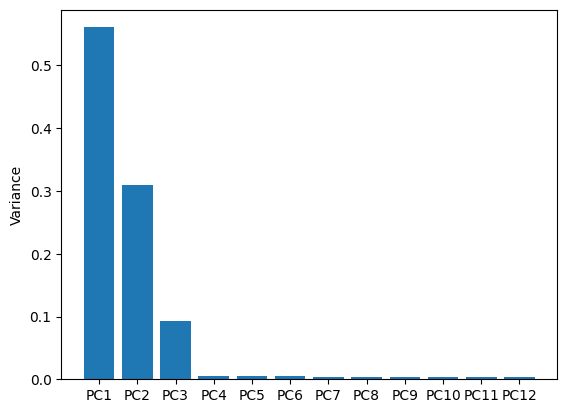

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
bar_labels = [f'PC{x}' for x in range(1,13)]

fig, ax = plt.subplots()
ax.bar(bar_labels, explained_variance_ratio)
ax.set_ylabel('Variance')

plt.show()

On the bar plot above shown the proportion of variation that each PC account for. So it is obvious that PC1 and PC2 account for the vast majority of the variation. Which means that 2-D graph using PC1 and PC2 would be a good approximation of 12-dimentional data.